# Applied and Practical Data science
## Team name - WSU Final

### Apoorva Palle (Z248H929) , Areeba Mohiuddin (D655Y483) , Sri Manikanta Reddy Tangirala (G332B644) , Lakshmi Vasanthi Godi (V567R326)

## Importing all the required libraryes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Aneesh Reddy\\OneDrive\\Desktop\\appu ads EDA\\GSS2018_values.csv")

AGE = df['AGE']
RELIG = df['RELIG']
CLASS = df['CLASS']
PARTYID = df['PARTYID']
PRES12 = df['PRES12']
Jew = df['Jew']
OTHER = df['OTHER']
ROWNGUN = df['ROWNGUN']
OTH16 = df['OTH16']
SEI10EDUC = df['SEI10EDUC']
PRES16 = df['PRES16']
X = pd.DataFrame({
    'AGE': AGE,
    'RELIG': RELIG,
    'CLASS': CLASS,
    'PARTYID': PARTYID,
    'PRES12': PRES12,
    'Jew': Jew,
    'OTHER': OTHER,
    'ROWNGUN': ROWNGUN,
    'OTH16': OTH16,
    'SEI10EDUC': SEI10EDUC
})
y = PRES16
X.head()

,AGE,RELIG,CLASS,PARTYID,PRES12,Jew,OTHER,ROWNGUN,OTH16,SEI10EDUC
0,43,11,2,5,2,0,0,0,0,82.4
1,74,2,2,2,1,0,0,0,0,16.5
2,42,4,3,4,2,0,0,0,0,89.4
3,63,1,3,2,2,0,0,0,0,86.7
4,71,2,4,6,2,0,0,1,0,79.2


### Displayed the total number of NULL values in the data set

In [3]:
a = df.isna().sum()
print("Total number of Null vales in data set :\n ",a)

Total number of Null vales in data set :
  ABANY       0
ABDEFECT    0
ABFELEGL    0
ABHELP1     0
ABHELP2     0
           ..
YEARSJOB    0
YEARSUSA    0
YEARVAL     0
YOUSUP      0
ZODIAC      0
Length: 1065, dtype: int64


### Displayed the total number of duplicate values in the data set

In [4]:
b = df.duplicated().sum()
print("Total number of duplicate vales in data set : ",b)

Total number of duplicate vales in data set :  0


### Identifying outliers

In [5]:
Q1 = X['AGE'].quantile(0.25)
Q3 = X['AGE'].quantile(0.75)
IQR = Q3 - Q1
l_b = Q1 - 1.5 * IQR
u_b = Q3 + 1.5 * IQR
Outliers = X[(X['AGE'] < l_b) | (X['AGE'] > u_b)]
print(Outliers)


Empty DataFrame
Columns: [AGE, RELIG, CLASS, PARTYID, PRES12, Jew, OTHER, ROWNGUN, OTH16, SEI10EDUC]
Index: []


### Printing Top 10 correlations of the Target Variable 

In [6]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['PRES16']
top_10_correlations = correlation_with_target.drop('PRES16').nlargest(10)
print(top_10_correlations)

PRES12       0.555662
PARTYID      0.239217
OTHER        0.185116
Jew          0.166840
AGE          0.162831
ROWNGUN      0.157964
RELIG        0.152613
OTH16        0.150806
CLASS        0.141861
SEI10EDUC    0.140594
Name: PRES16, dtype: float64


### Printing the Dependend and Independent variables 

In [7]:
print("Dependent Variable ""y"": ""PRES16""\n",y.head(3))
print("Independent Variables ""X"" : \n",X.head(3))

Dependent Variable y: PRES16
 0    2
1    2
2    2
Name: PRES16, dtype: int64
Independent Variables X : 
    AGE  RELIG  CLASS  PARTYID  PRES12  Jew  OTHER  ROWNGUN  OTH16  SEI10EDUC
0   43     11      2        5       2    0      0        0      0       82.4
1   74      2      2        2       1    0      0        0      0       16.5
2   42      4      3        4       2    0      0        0      0       89.4


### Creating a table for Independent Variables and Dependent Variable

In [8]:
data = {'Dependent Variable': ['PRES16'],
        'Independent Variables': ['AGE' , 'RELIG' ,'CLASS','PARTYID','PRES12','Jew','OTHER','ROWNGUN','OTH16','SEI10EDUC']}
max_l = max(len(val) for val in data.values())
for key, val in data.items():
    if len(val) < max_l:
        data[key].extend(['None'] * (max_l - len(val)))
df2 = pd.DataFrame(data)
print(df2)

  Dependent Variable Independent Variables
0             PRES16                   AGE
1               None                 RELIG
2               None                 CLASS
3               None               PARTYID
4               None                PRES12
5               None                   Jew
6               None                 OTHER
7               None               ROWNGUN
8               None                 OTH16
9               None             SEI10EDUC


## Data Visualization

###  Bar plot for Dependent Variable PRES16

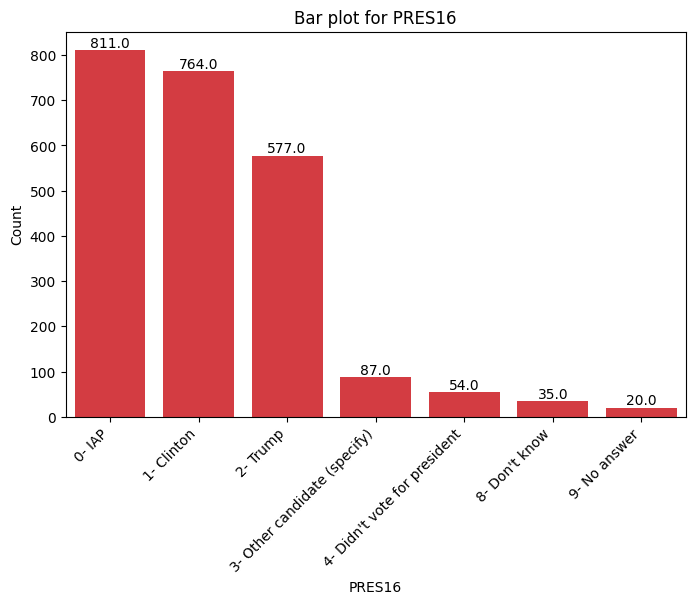

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PRES16', order=df['PRES16'].value_counts().index, color='#EC232B')
plt.title('Bar plot for PRES16')
plt.xlabel('PRES16')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
x_labels = ['0- IAP', '1- Clinton', '2- Trump', '3- Other candidate (specify)', "4- Didn't vote for president", "8- Don't know", '9- No answer']
x_ticks = range(len(x_labels))
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels, rotation = 45, ha= 'right')
plt.show()

### Bar plot for Independent Variable RELIG

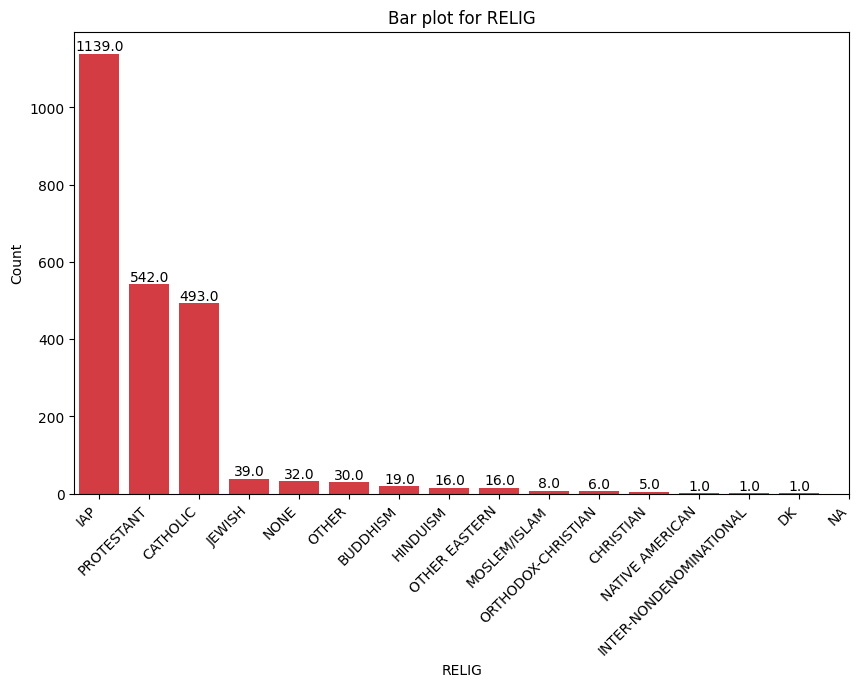

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RELIG', order=df['RELIG'].value_counts().index, color='#EC232B')
plt.title('Bar plot for RELIG')
plt.xlabel('RELIG')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
x_labels = ['IAP', 'PROTESTANT', 'CATHOLIC', 'JEWISH', 'NONE', 'OTHER', 'BUDDHISM', 'HINDUISM', 'OTHER EASTERN', 'MOSLEM/ISLAM', 'ORTHODOX-CHRISTIAN', 'CHRISTIAN', 'NATIVE AMERICAN', 'INTER-NONDENOMINATIONAL', 'DK', 'NA']
x_ticks = range(len(x_labels))
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels, rotation=45, ha='right')

plt.show()

### Bar plot for Variable PRES12

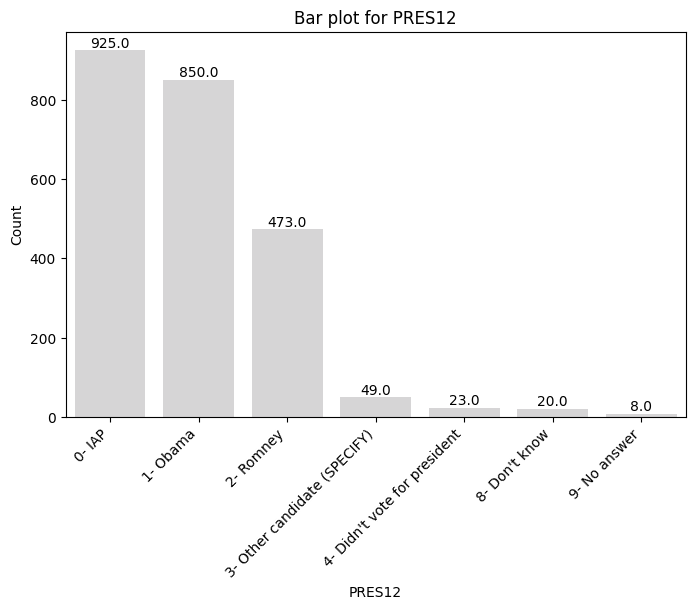

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PRES12', order=df['PRES12'].value_counts().index, color= '#D6D5D6')
plt.title('Bar plot for PRES12')
plt.xlabel('PRES12')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
x_labels = ['0- IAP', '1- Obama', '2- Romney', '3- Other candidate (SPECIFY)', "4- Didn't vote for president", "8- Don't know", '9- No answer']
x_ticks = range(len(x_labels))
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(x_labels, rotation=45, ha='right')

plt.show()

### Bar plot for Independent Variable AGE

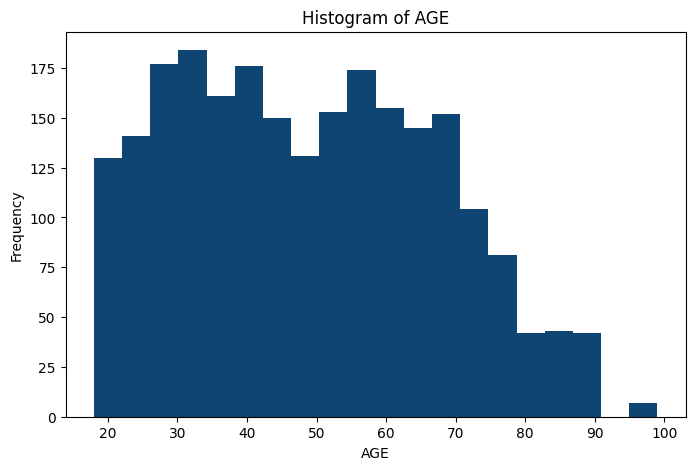

In [12]:
plt.figure(figsize=(8,5))
plt.hist(df['AGE'], bins=20, color='#0E4572')
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

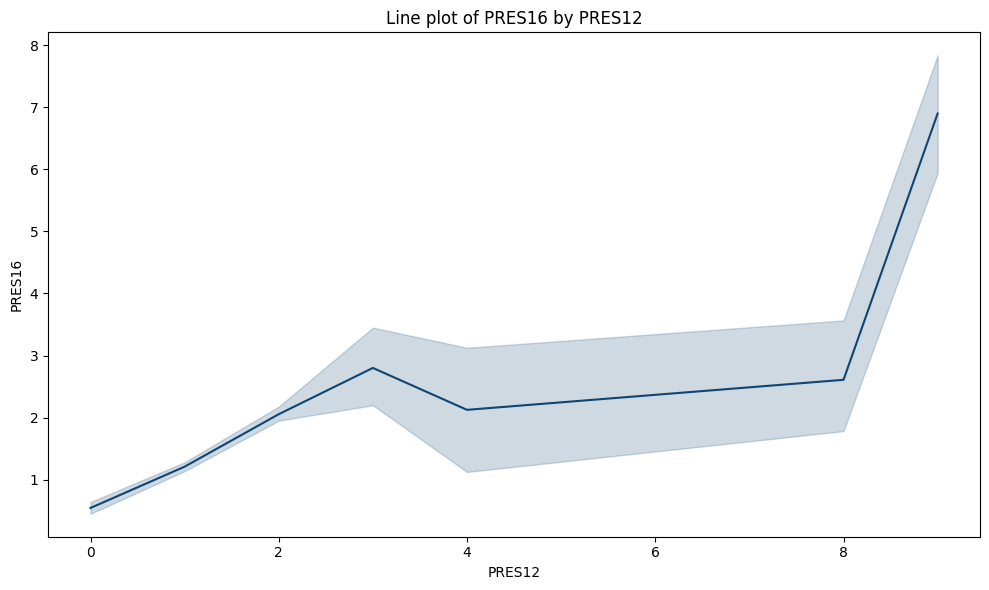

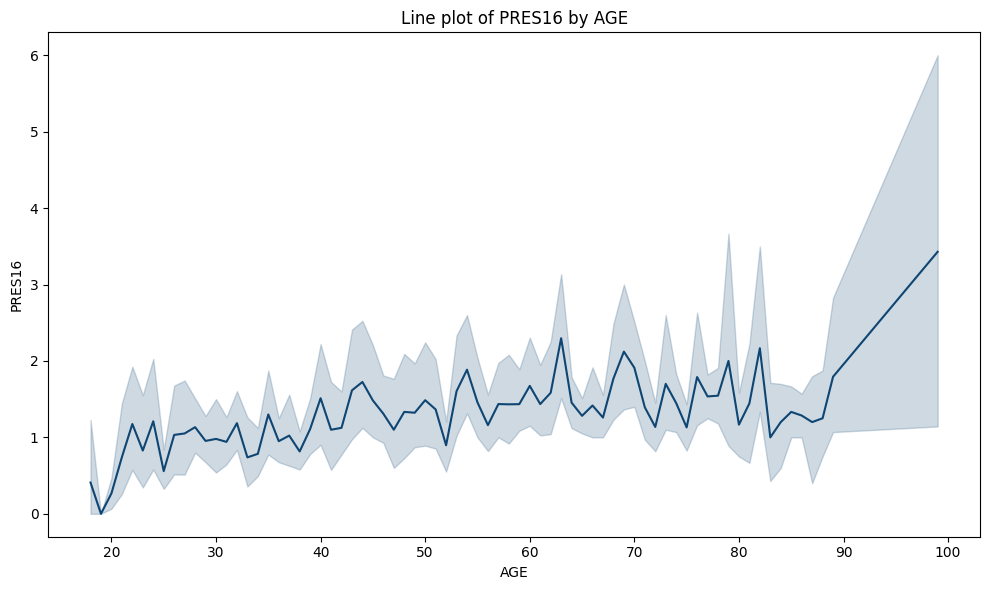

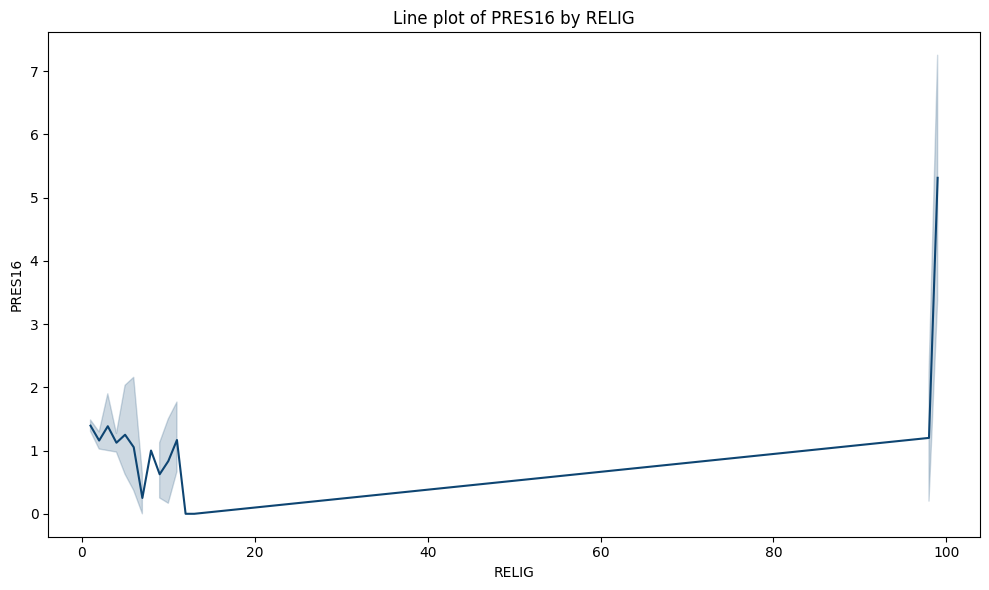

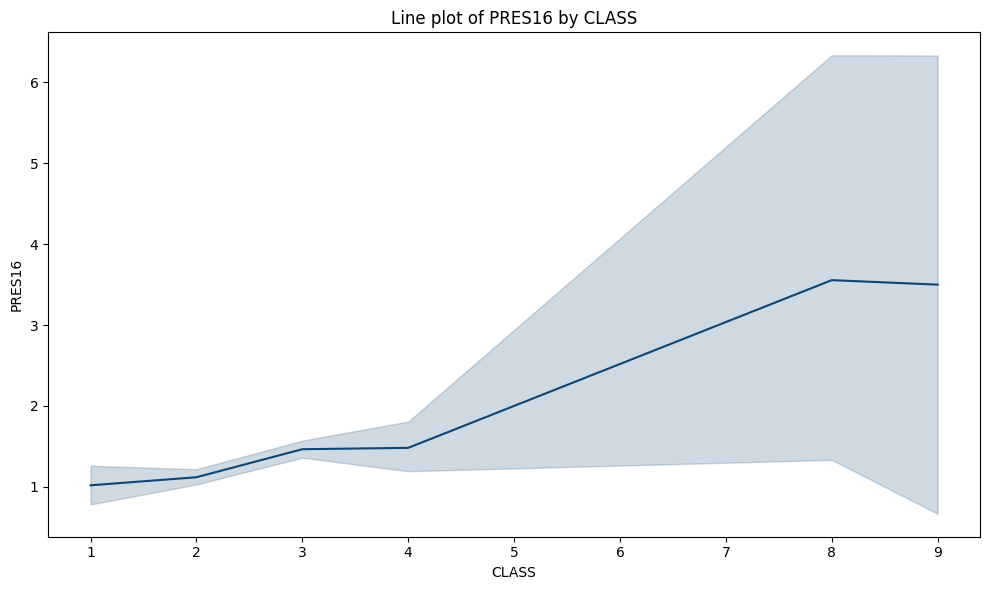

In [13]:
dependent_variable = 'PRES16'
independent_variables = ['PRES12', 'AGE', 'RELIG' ,'CLASS']
for independent_var in independent_variables:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=independent_var, y=dependent_variable, data=df, color='#0E4572')
    plt.title('Line plot of {} by {}'.format(dependent_variable, independent_var))
    plt.xlabel(independent_var)
    plt.ylabel(dependent_variable)
    plt.tight_layout()
    plt.show()

### Splitting the data into testing and training data sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model Selection 

## Decision Tree Regression model

In [15]:
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)
D_pred = decisionTree_model.predict(X_test)

### calculating R-squared score and mean square error for the Decision Tree Regression

In [17]:
a_DTR = accuracy_score(y_test, D_pred)
print("Accuracy:", a_DTR)
print("Accuracy percent :", a_DTR*100)
r2_D = r2_score(y_test, D_pred)
print("decisionTree_model R-squared score is " , r2_D)


Accuracy: 0.6191489361702127
Accuracy percent : 61.91489361702127
decisionTree_model R-squared score is  -0.27936275260536325


### Support Vector Machine

In [18]:
SVM_model = SVC(kernel='linear', random_state=42)
SVM_model.fit(X_train, y_train)
S_pred = SVM_model.predict(X_test)

### calculating R-squared score and mean square error for SVM

In [19]:
a_svm = accuracy_score(y_test, S_pred)
print("Accuracy:", a_svm)
print("Accuracy percent :", a_svm*100)
r2_S = r2_score(y_test, S_pred)
print("SVM R-squared score is " , r2_S)

Accuracy: 0.7297872340425532
Accuracy percent : 72.97872340425532
SVM R-squared score is  0.2647734482683177


### By calculating the Accuracy and R-squared score, we can say that the Support Vector Machine is the best fit for our data set as we can see that the Accuracy percent and R-squared score are high when compared to Decision Tree Regression model.

### Visualization Showing and Comparing Accuracy and R-squared score of the models

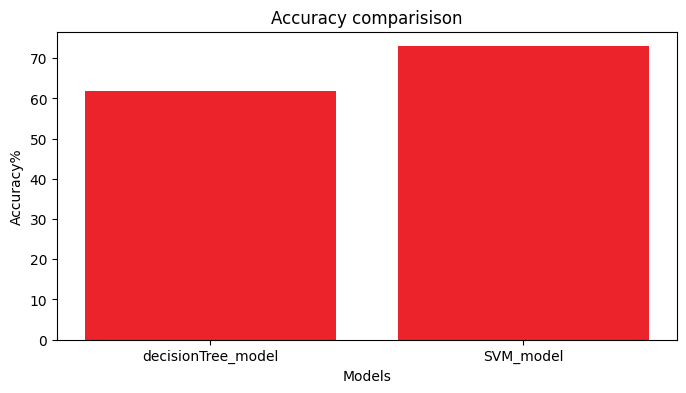

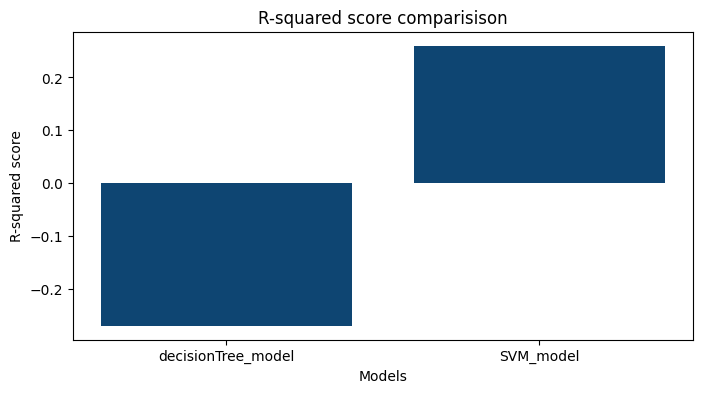

In [21]:
models = ['decisionTree_model', 'SVM_model']
accuracy_values = [61.91,72.97]  
r2_values = [-0.27,0.26]

# Plotting the MSE values
plt.figure(figsize=(8 , 4))
plt.bar(models, accuracy_values, color='#EC232B')
plt.xlabel('Models')
plt.ylabel('Accuracy%')
plt.title('Accuracy comparisison')
plt.show()

# Plotting the R-squared score
plt.figure(figsize=(8, 4))
plt.bar(models, r2_values, color='#0E4572')
plt.xlabel('Models')
plt.ylabel('R-squared score')
plt.title('R-squared score comparisison')
plt.show()


### Accuracy and R-squared of SVM

In [23]:
print("Accuracy of SVM is " , a_svm*100)
print("R-squared score of SVM is " , r2_S)

Accuracy of SVM is  72.97872340425532
R-squared score of SVM is  0.2647734482683177
